# Vogue Fashion Trends EDA

In [14]:
# Imports
import pandas as pd
import re
import spacy
import nltk
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [15]:
# Load NLP model
nlp = spacy.load("en_core_web_sm")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tesss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Load scraped data
df = pd.read_csv(r"C:\Users\tesss\OneDrive\Desktop\PersonalProjects\fashion-trends-visualization\vogue_fashion_articles_full.csv")

In [17]:
# Function to clean and process text
def clean_text(text):
    if pd.isna(text):
        return ""
    
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\W+", " ", text)  # Remove special characters
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

In [18]:
# Apply cleaning
df["Cleaned_Content"] = df["Content"].apply(clean_text)
df.head()

,Title,Link,Date,Author,Content,Cleaned_Content
0,The Best Vintage Looks From the 2025 Awards Se...,https://www.vogue.com/slideshow/best-vintage-o...,"February 18, 2025",By Christian Allaire,"When you think of awards season, you likely en...",think awards season likely envision list stars...
1,The White Lotus Season 3 Fashion Is All About ...,https://www.vogue.com/article/the-white-lotus-...,"February 17, 2025",By Fawnia Soo Hoo,"Set on the picturesque island of Koh Samui, th...",set picturesque island koh samui third season ...
2,Ayo Edebiri Wore New York Fashion Week’s Risin...,https://www.vogue.com/article/ayo-edebiri-snl-...,"February 18, 2025",By Hannah Jackson,It’s no secret that Ayo Edebiri quickly ascend...,secret ayo edebiri quickly ascended one hollyw...
3,The Biggest Stars on the Front Row of London F...,https://www.vogue.com/slideshow/celebrities-fr...,"February 21, 2025",By Daisy Jones,Products are independently selected by our edi...,products independently selected editors may ea...
4,Why Are We So Obsessed With Celebrity Court St...,https://www.vogue.com/article/celebrity-court-...,"February 19, 2025",By Hannah Jackson,"Yesterday, A$AP Rocky was found not guilty in ...",yesterday ap rocky found guilty felony assault...


In [35]:
# Define a set of fashion-related words to keep
fashion_terms = {"dress", "runway", "trends", "designer", "fashion", "style", "wear", "outfit", "look", "vintage", "couture"}

def extract_keywords(text, top_n=20):
    doc = nlp(text)
    words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words]
    
    # Filter only fashion-related words
    filtered_words = [word for word in words if word in fashion_terms]
    
    return Counter(filtered_words).most_common(top_n)

In [36]:
# Extract keywords from all articles
all_text = " ".join(df["Cleaned_Content"].dropna())
top_keywords = extract_keywords(all_text)
print(top_keywords)

[('fashion', 680), ('dress', 562), ('look', 536), ('wear', 527), ('style', 275), ('runway', 239), ('vintage', 188), ('designer', 124), ('couture', 109), ('outfit', 93)]


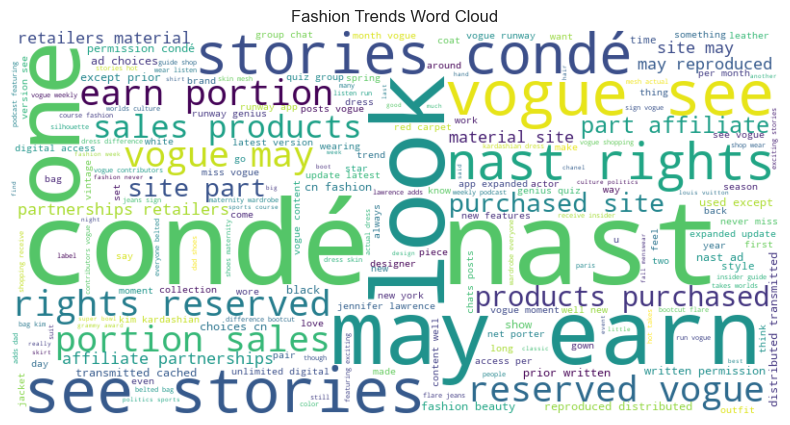

In [44]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Fashion Trends Word Cloud")
plt.show()